<a href="https://colab.research.google.com/github/Deepu-Pk/AI-Lab9/blob/main/Soft%20margin%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import pandas as pd
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['train1.csv']))
uploaded = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded['test1.csv']))
feature1 = train_data['2']
feature2 = train_data['3']
label1 = train_data['1']

Saving train1.csv to train1.csv


Saving test1.csv to test1.csv


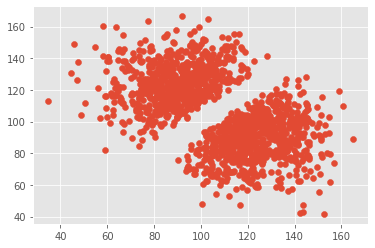

In [3]:
#Plotting data
x1 = []
x2 = []
Y = []
m = len(feature1)
for i in range(m):
    x1.append(feature1[i])
    x2.append(feature2[i])
    Y.append(label1[i])
X1 = [list(z) for z in zip(x1, x2)]
plt.scatter(x1,x2)
plt.show()

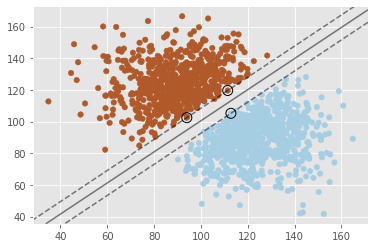

In [4]:
#Plotting decision boundary(Sub Question : i)
#Reguarization parameter = 1(default value)
X =np.array(X1)
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(X,Y)
w = clf.coef_[0]
#print(w)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [7]:
#Testind data Sub question: (ii)
test_feature1 = test_data['1']
test_feature2 = test_data['2']
test_label1 = test_data['3']

#print(test_feature1[0])
test_x1 = []
test_x2 = []
test_Y = []
test_m = len(test_feature1)
for i in range(test_m):
    test_x1.append(test_feature1[i])
    test_x2.append(test_feature2[i])
    test_Y.append(test_label1[i])
test_X1 = [list(z) for z in zip(test_x1, test_x2)]
test_X =np.array(test_X1)
#print(test_X1[0])
#p1 = test_x1[0]
#p2 = test_x2[0]
#print(p1)
p = []
predict = []
#print(clf.predict([test_X1[0]]))
for i in range(test_m):
    p1 = (clf.predict([test_X1[i]]))
    p.append(p1)
    predict.append(p[i][0])
#print(predict)
a = 'correctly_classified'
b = 'Misclassified'
classified = []#Contaning classified and missclassified
for j in range(test_m):
    if(test_Y[j] == predict[j]):
        classified.append(a)
    else:
        classified.append(b)

#print(test_Y)
Prediction = {
    'Predicted class' : predict,
    'Class we need' : test_Y,
    'Classification' : classified
}
predict1 = pd.DataFrame(Prediction)
print(predict1)
print("THere is no missclassification")

     Predicted class  Class we need        Classification
0                 -1             -1  correctly_classified
1                 -1             -1  correctly_classified
2                 -1             -1  correctly_classified
3                  1              1  correctly_classified
4                 -1             -1  correctly_classified
..               ...            ...                   ...
495                1              1  correctly_classified
496               -1             -1  correctly_classified
497               -1             -1  correctly_classified
498               -1             -1  correctly_classified
499               -1             -1  correctly_classified

[500 rows x 3 columns]
THere is no missclassification


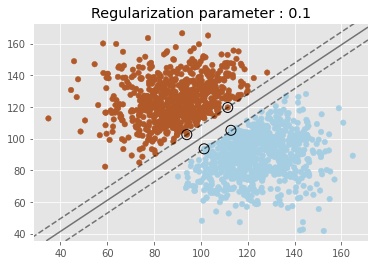

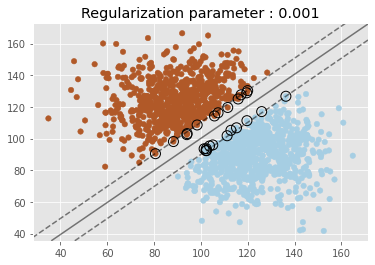

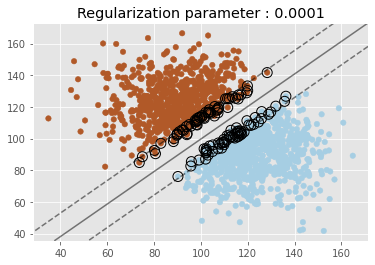

In [14]:
#Sub question(iii) Different values of regularization parameter
def regularization(c):
    global X,Y
    clf = svm.SVC(kernel='linear', C = c)
    clf.fit(X,Y)
    w = clf.coef_[0]
    #print(w)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    if(c == 0.01):
        plt.title("Regularization parameter : 0.1") 
    elif(c == 0.001):
        plt.title("Regularization parameter : 0.001")
    elif(c == 0.0001):
        plt.title("Regularization parameter : 0.0001")
    print()
    print()
    plt.show()

#regularization value = 0.01
regularization(0.01)
#regularization value = 0.001
regularization(0.001)
#regularization value = 0.0001
regularization(0.0001)